In [1]:
import platform
print(platform.python_version())

3.12.7


In [2]:
pip install -q --upgrade pip pandas keras tensorflow matplotlib numpy setuptools scikit-learn seaborn imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

np.random.seed(2)

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
len(data)

284807

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


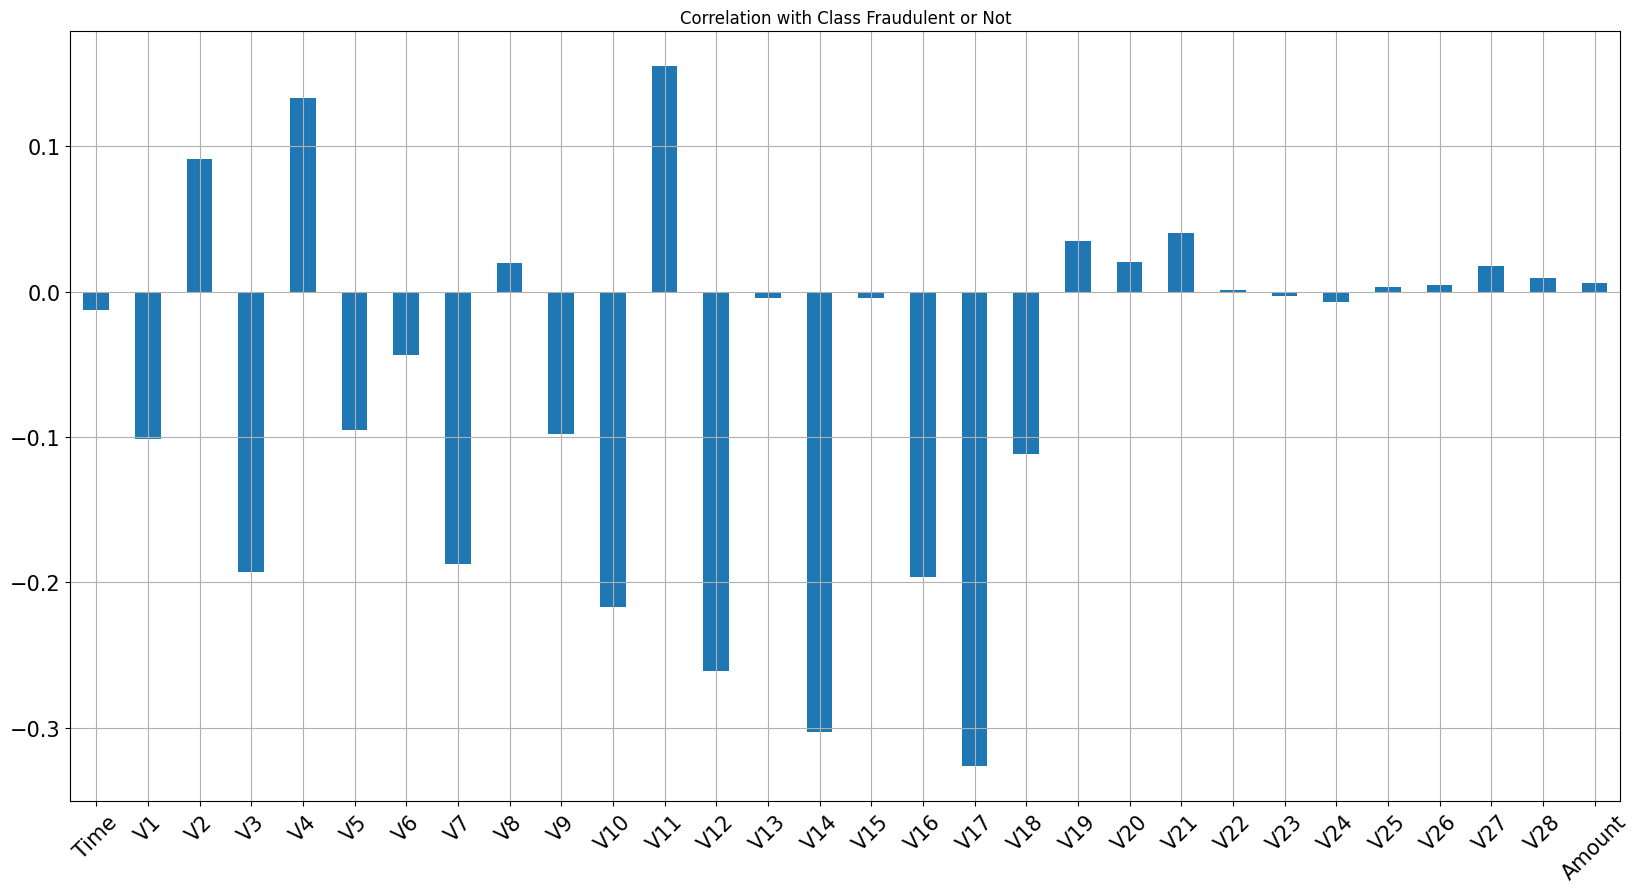

In [8]:
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [10]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
X = X.drop(['Time'],axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [12]:
X_train_scaled = X_train.copy() #X_train 
X_test_scaled = X_test.copy()

In [13]:
X_train_scaled['Amount'] = StandardScaler().fit_transform(X_train_scaled['Amount'].values.reshape(-1,1)) 
X_test_scaled['Amount'] = StandardScaler().fit_transform(X_test_scaled['Amount'].values.reshape(-1,1)) 

In [14]:
X_test_scaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,-0.183639
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,-0.330296
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0.032372
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0.850129
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,-0.318647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208059,-0.429070,0.712074,0.675855,-0.403577,0.668849,-0.413713,0.665961,0.099935,-0.379066,-1.117560,...,0.016809,-0.102000,-0.391487,-0.332563,-0.512572,0.746656,0.368231,-0.150931,-0.111220,-0.222406
260930,-4.673996,-3.716208,-1.486611,0.829036,0.902701,-0.501887,2.994824,-1.188013,0.864683,-0.798728,...,-2.927002,-1.387099,0.414913,3.103269,0.642007,0.464011,0.027749,0.973848,-1.566714,1.718225
75125,-1.215390,1.379556,0.438732,1.394346,-0.377212,0.843496,-0.975098,-1.969737,-0.917814,-0.602581,...,0.659545,-1.230618,0.716991,0.107986,0.042642,-0.046630,-0.251591,0.234356,-0.035339,-0.118065
37292,-0.632439,1.212284,1.388188,0.151509,-0.342824,-1.337771,0.648076,-0.046668,-0.103480,-0.177378,...,0.170883,-0.268740,-0.687707,0.082524,0.838322,-0.207461,0.046706,0.345269,0.168419,-0.310353


In [15]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [16]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
skf = StratifiedKFold(n_splits = 5)

In [19]:
# Approach to plot confusion matrix (from scikit-learn.org site)
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Random Forest

In [20]:
random_forest = RandomForestClassifier(n_estimators=3)

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('normalize_amount', StandardScaler(), ['Amount']) 
    ],
    remainder='passthrough' 
)


In [22]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

In [23]:
cv_scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=skf)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.99927269 0.99949841 0.99937301 0.99937301 0.99927267]
Mean cross-validation score: 0.9993579578796306


In [24]:
random_forest.fit(X_train_scaled,y_train.values.ravel()) 

RandomForestClassifier(n_estimators=3)

In [25]:
y_pred = random_forest.predict(X_test_scaled)

In [26]:
random_forest.score(X_test_scaled,y_test)

0.9994616293903538

Confusion matrix, without normalization
[[85289     7]
 [   39   108]]


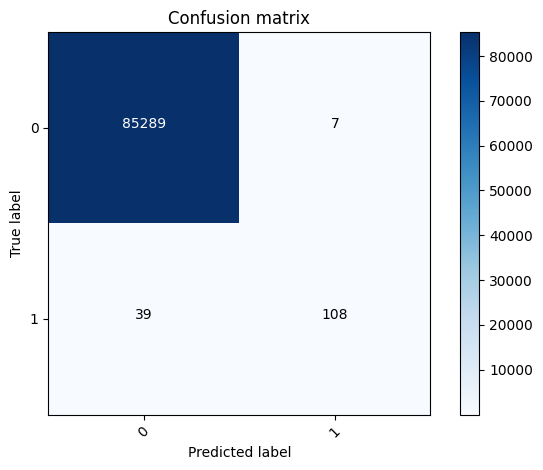

In [27]:
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print metrics
print('accuracy:%0.4f' % acc, '\tprecision:%0.4f' % prec, '\trecall:%0.4f' % rec, '\tF1-score:%0.4f' % f1)

accuracy:0.9995 	precision:0.9391 	recall:0.7347 	F1-score:0.8244


In [29]:
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999462,0.265306,0.734694,0.93913,0.824427


## Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [31]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

In [32]:
cv_scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=skf)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.99907205 0.99927269 0.99922253 0.99907205 0.99914727]
Mean cross-validation score: 0.9991573202280805


In [33]:
decision_tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

### decision_tree.score(X_test_scaled,y_test)

Confusion matrix, without normalization
[[85268    28]
 [   37   110]]


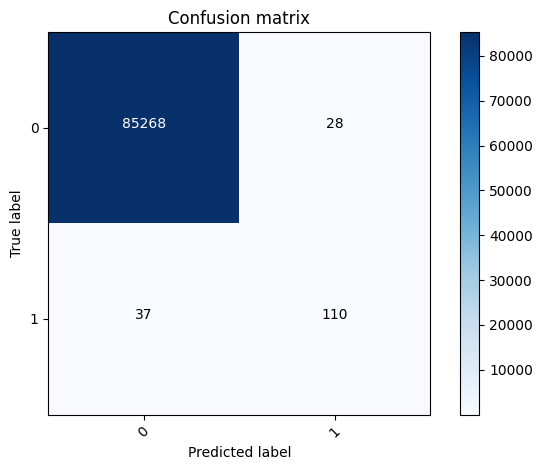

In [34]:
y_pred = decision_tree.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [35]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print metrics
print('accuracy:%0.4f' % acc, '\tprecision:%0.4f' % prec, '\trecall:%0.4f' % rec, '\tF1-score:%0.4f' % f1)

accuracy:0.9992 	precision:0.7971 	recall:0.7483 	F1-score:0.7719


## Neural Networks

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [37]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,113 (8.25 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
nn_classifier =  KerasClassifier(model=model, epochs=5, batch_size=15)

In [42]:
nn_classifier

KerasClassifier(
	model=<Sequential name=sequential, built=True>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=15
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
	class_weight=None
)

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('normalize_amount', StandardScaler(), [28]) 
    ],
    remainder='passthrough' 
)


In [44]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', nn_classifier)
])

In [45]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 329us/step - accuracy: 0.9935 - loss: 0.0275
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 325us/step - accuracy: 0.9993 - loss: 0.0041
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 321us/step - accuracy: 0.9992 - loss: 0.0037
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 325us/step - accuracy: 0.9994 - loss: 0.0031
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 321us/step - accuracy: 0.9994 - loss: 0.0033
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 1s 210us/step
Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 334us/step - accuracy: 0.9930 - loss: 0.0329
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 5s 428us/step - accuracy: 0.9993 - loss: 0.0040
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 328us/step - accuracy: 0.9994 - loss: 0.0032
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 332us/step - accuracy: 0.9993 - loss: 0.0036
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 325us/step - accuracy: 0.9993 - loss: 0.0037
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 1s 215us/step
Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 327us/step - accuracy: 0.9929 - loss: 0.0309
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 327us/step - accuracy: 0.9993 - loss: 0.0036
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 327us/step - accuracy: 0.9994 - loss: 0.0028
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 337us/step - accuracy: 0.9994 - loss: 0.0030
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 348us/step - accuracy: 0.9994 - loss: 0.0027
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step
Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 311us/step - accuracy: 0.9930 - loss: 0.0296
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 388us/step - accuracy: 0.9993 - loss: 0.0040
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 327us/step - accuracy: 0.9993 - loss: 0.0039
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 406us/step - accuracy: 0.9994 - loss: 0.0041
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 384us/step - accuracy: 0.9993 - loss: 0.0035
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 1s 216us/step
Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 372us/step - accuracy: 0.9930 - loss: 0.0316
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 311us/step - accuracy: 0.9992 - loss: 0.0043
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 373us/step - accuracy: 0.9993 - loss: 0.0038
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 375us/step - accuracy: 0.9995 - loss: 0.0035
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 378us/step - accuracy: 0.9993 - loss: 0.0037
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 1s 214us/step
Cross-validation scores: [0.99922253 0.99942317 0.99922253 0.99932285 0.99927267]
Mean cross-validation score: 0.9992927508473031


In [46]:
model.fit(X_train_scaled,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 5s 337us/step - accuracy: 0.9940 - loss: 0.0254
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 5s 346us/step - accuracy: 0.9995 - loss: 0.0034
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 333us/step - accuracy: 0.9994 - loss: 0.0041
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 318us/step - accuracy: 0.9995 - loss: 0.0026
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 330us/step - accuracy: 0.9994 - loss: 0.0032


In [47]:
score = model.evaluate(X_test_scaled, y_test)
print(score)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step - accuracy: 0.9993 - loss: 0.0040
[0.0038373868446797132, 0.9993445873260498]


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 224us/step
Test Data Accuracy: 0.9993


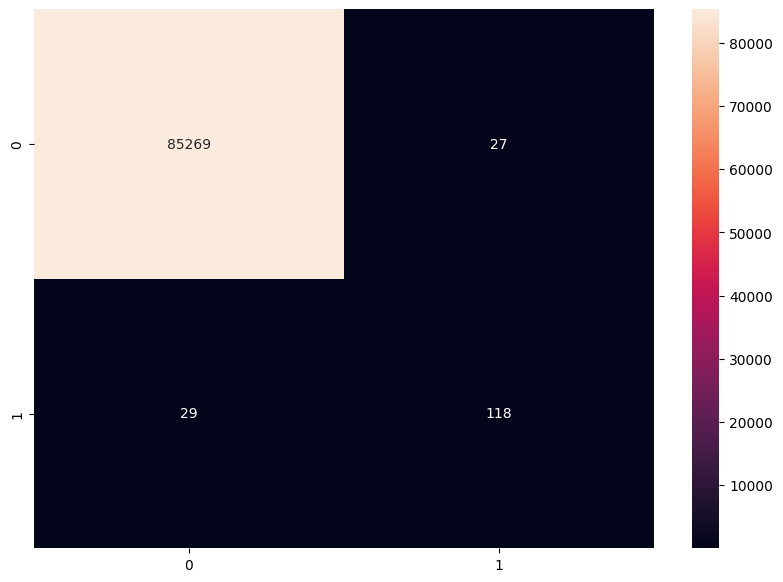

In [48]:

import seaborn as sn
y_pred = model.predict(X_test_scaled)
for i in range(len(y_test)):   
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [49]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [50]:

# Create the new DataFrame with the model results
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Use pd.concat to combine the DataFrames
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999462,0.265306,0.734694,0.939130,0.824427
1,PlainNeuralNetwork,0.999345,0.197279,0.802721,0.813793,0.808219


## Weighted NN

In [51]:
from sklearn.utils import class_weight

flat_y_train = np.ravel(y_train)  # Flatten y_train to ensure it's a 1D array if it's 2D

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=flat_y_train
)
# Convert to dictionary format
class_weights_dict = dict(zip(np.unique(y_train), class_weights_array))

In [52]:
fit_params = {'classifier__class_weight': class_weights_dict}

In [53]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf,params=fit_params)

Epoch 1/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 329us/step - accuracy: 0.6422 - loss: 3.9760
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 328us/step - accuracy: 0.9316 - loss: 0.2432
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 3s 323us/step - accuracy: 0.9670 - loss: 0.3182
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 339us/step - accuracy: 0.9586 - loss: 0.2834
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 5s 487us/step - accuracy: 0.9568 - loss: 0.2633
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step
Epoch 1/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 5s 404us/step - accuracy: 0.6593 - loss: 4.7384
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 355us/step - accuracy: 0.9353 - loss: 0.6472
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 346us/step - accuracy: 0.9445 - loss: 0.2766
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 331us/step - accuracy: 0.9480 - loss: 0.4173
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 4s 332us/step - accuracy: 0.9458 - loss: 0.5527
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 1s 211us/step


In [54]:
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.98660748 0.97331528 0.99139769 0.99062022 0.98131521]
Mean cross-validation score: 0.9846511740536638


In [83]:
model.fit(X_train_scaled, y_train, batch_size=15, epochs=5, class_weight=class_weights_dict, shuffle=True)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 5s 330us/step - accuracy: 0.9940 - loss: 0.2032
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 327us/step - accuracy: 0.9962 - loss: 0.1477
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 323us/step - accuracy: 0.9947 - loss: 0.4397
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 327us/step - accuracy: 0.9944 - loss: 0.2978
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 321us/step - accuracy: 0.9938 - loss: 0.1501


In [84]:
score = model.evaluate(X_test_scaled, y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 208us/step - accuracy: 0.9965 - loss: 0.0268


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 222us/step
Test Data Accuracy: 0.9964


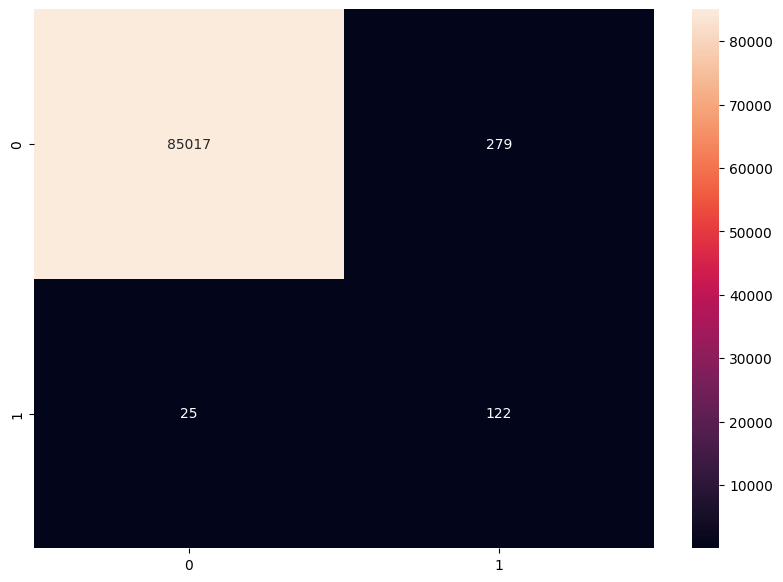

In [85]:
y_pred = model.predict(X_test_scaled)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [86]:
print(score)

[0.03192240744829178, 0.9964420795440674]


In [87]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [60]:
# ### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])

# Append new results to the existing DataFrame using concat
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

# Display the updated DataFrame
results_testset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999462,0.265306,0.734694,0.939130,0.824427
1,PlainNeuralNetwork,0.999345,0.197279,0.802721,0.813793,0.808219
2,WeightedNeuralNetwork,0.989888,0.170068,0.829932,0.126951,0.220217


## undersample

In [61]:
fraud_indices = np.array(data[data.Class == 1].index)
normal_indices = data[data.Class == 0].index
random_normal_indices = np.array(np.random.choice(normal_indices, len(fraud_indices), replace=False))
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [62]:
under_sample_data = data.iloc[under_sample_indices,:]

In [63]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [64]:
Xu_train, Xu_test, yu_train, yu_test = train_test_split(X_undersample,y_undersample, test_size=0.3)
Xu_train2 = Xu_train.copy()
Xu_test2 = Xu_test.copy()
Xu_train2['Amount'] = StandardScaler().fit_transform(Xu_train['Amount'].values.reshape(-1,1)) 
Xu_test2['Amount'] = StandardScaler().fit_transform(Xu_test['Amount'].values.reshape(-1,1)) 

In [65]:
Xu_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
186952,127324.0,-0.772246,0.424254,0.106177,-0.715734,1.461388,-0.774232,0.986974,-0.107698,-0.606499,...,-0.125405,0.107767,0.222308,-0.257244,0.809607,0.108058,0.475580,-0.129657,0.185829,9.99
135718,81372.0,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,...,0.370041,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57
191935,129463.0,1.779353,-0.416804,-1.215732,0.130965,0.622852,1.544809,-0.748062,0.604543,0.734709,...,-0.148422,-0.197599,-0.505306,0.452489,-0.853828,-0.829565,0.186093,0.019564,-0.028493,44.40
151462,95559.0,-16.308650,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,2.106034,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63
189886,128597.0,0.045512,1.538350,-0.126802,2.766168,1.391158,-0.716976,1.747696,-0.278162,-2.120833,...,-0.301315,0.225865,0.496491,-0.193293,-0.058706,0.072804,0.074426,-0.023614,0.026719,26.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151008,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00
846,646.0,1.042004,-0.905564,0.271573,-0.226902,-0.299177,1.414216,-0.793353,0.476655,1.190420,...,0.112996,-0.214919,-0.636974,-0.198086,-1.644056,0.193481,1.053445,-0.049467,-0.000293,114.34
30314,35866.0,-2.044489,3.368306,-3.937111,5.623120,-3.079232,-1.253474,-5.778880,1.707428,-4.467103,...,1.112028,1.483594,0.834311,-0.148486,0.001669,-0.038996,0.389526,1.300236,0.549940,7.61
112840,72824.0,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,...,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,45.03


In [66]:
Xu_train=Xu_train.drop(['Time'],axis=1)
Xu_test=Xu_test.drop(['Time'],axis=1)
Xu_train2=Xu_train2.drop(['Time'],axis=1)
Xu_test2=Xu_test2.drop(['Time'],axis=1)

In [67]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [68]:
cv_scores = cross_val_score(pipeline, Xu_train2, yu_train, cv=skf,params=fit_params)

Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.3843 - loss: 27018.7812
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.4706 - loss: 9.3254
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.5109 - loss: 8.0257
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.5302 - loss: 10.0062
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.4804 - loss: 14.3883
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.4044 - loss: 14987.1104
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.4721 - loss: 8.1586
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.4749 - loss: 11.0585
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.4992 - loss: 9.2366
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.4868 - loss: 9.6018 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.4226 - loss: 19038.6953
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.4943 - loss: 7.9100
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.5124 - loss: 9.5621 
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.5287 - loss: 8.7914
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.4924 - loss: 8.6798
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.3886 - loss: 21619.8633
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.4494 - loss: 7.8833
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.4872 - loss: 8.5477 
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.4643 - loss: 10.2232
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.5154 - loss: 14.3743
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Epoch 1/5


/Users/sergi/Public/MUN/COMP-6936-001/Credit-Card-fraud/env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.4524 - loss: 18425.6562
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.4910 - loss: 9.8717 
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.5304 - loss: 9.5223
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.4801 - loss: 8.8313
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.5096 - loss: 9.7628 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [69]:
model.fit(Xu_train2,yu_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.9179 - loss: 0.4061
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.9437 - loss: 0.2441
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9063 - loss: 0.3898
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9333 - loss: 0.4065
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9478 - loss: 0.2154


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion matrix, without normalization
[[148   0]
 [ 75  73]]


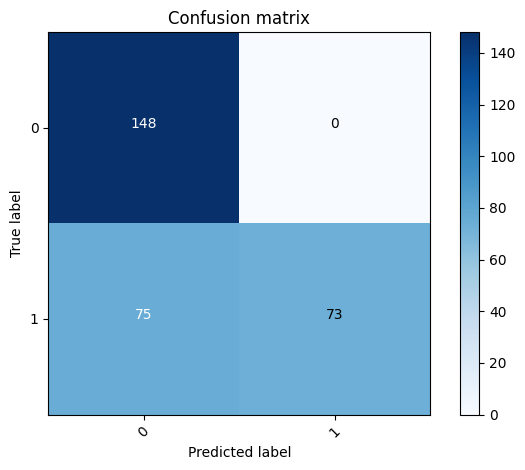

In [70]:
y_pred = model.predict(Xu_test)
y_expected = pd.DataFrame(yu_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

In [72]:
acc = accuracy_score(yu_test, y_pred.round())
prec = precision_score(yu_test, y_pred.round())
rec = recall_score(yu_test, y_pred.round())
f1 = f1_score(yu_test, y_pred.round())

## Oversampling

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
smote = SMOTE()
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
X_test_resample, y_test_resample = smote.fit_resample(X_test, y_test)

In [76]:
X_train_resample = pd.DataFrame(X_train_resample)
X_test_resample = pd.DataFrame(X_test_resample)
y_train_resample = pd.DataFrame(y_train_resample)
y_test_resample = pd.DataFrame(y_test_resample)

In [77]:
X_train_resample = np.array(X_train_resample)
X_test_resample = np.array(X_test_resample)
y_train_resample = np.array(y_train_resample)
y_test_resample = np.array(y_test_resample)

In [78]:
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', nn_classifier)
])

In [79]:
np.ravel(y_train_resample).shape

(398038,)

In [80]:
print(X_train_resample.shape)
print(y_train_resample.shape)

(398038, 29)
(398038, 1)


In [81]:
model.fit(X_train_resample,y_train_resample,batch_size=15,epochs=5)

Epoch 1/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 9s 308us/step - accuracy: 0.8944 - loss: 7.1691
Epoch 2/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 10s 381us/step - accuracy: 0.9918 - loss: 0.0340
Epoch 3/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 9s 331us/step - accuracy: 0.9942 - loss: 0.0246
Epoch 4/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 9s 320us/step - accuracy: 0.9939 - loss: 0.0231
Epoch 5/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 8s 313us/step - accuracy: 0.9950 - loss: 0.0189


5331/5331 ━━━━━━━━━━━━━━━━━━━━ 1s 197us/step
Confusion matrix, without normalization
[[85061   235]
 [ 9768 75528]]


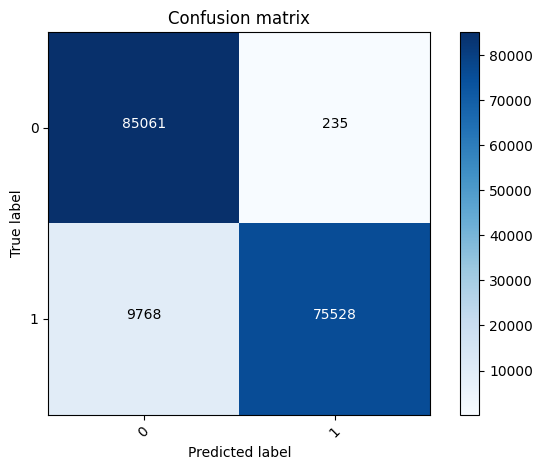

In [82]:
y_pred = model.predict(X_test_resample)
y_expected = pd.DataFrame(y_test_resample)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()